In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()


In [4]:
dataset = pd.DataFrame(df.data)

In [5]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
dataset.columns = df.feature_names

In [7]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
## Independent features and dependent features
X = dataset
y = df.target

In [9]:
y


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
## Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [12]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [13]:
## standardizing the dataset ==>> z = (x-u)/s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [14]:
## fit_transform combines the steps of fitting and transforming data, while transform applies the transformation to data.
## fit: Calculates parameters needed to transform the data
## transform : Applies the transformation to the data using the parameters calculated in the fit step
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
## to get previous value
#  scaler.inverse_transform(X_train)

In [17]:
## apply LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
# cross validation:
from sklearn.model_selection import cross_val_score

In [18]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
## mse = mean squared error
mse = cross_val_score(regression,X_train,y_train,scoring ='neg_mean_squared_error',cv =5)

In [20]:
mse

array([-0.54787556, -0.500835  , -0.52045639, -0.51612252, -0.54883741])

In [21]:
np.mean(mse)

-0.5268253746355749

In [22]:
## Prediction
reg_predict = regression.predict(X_test)

In [23]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

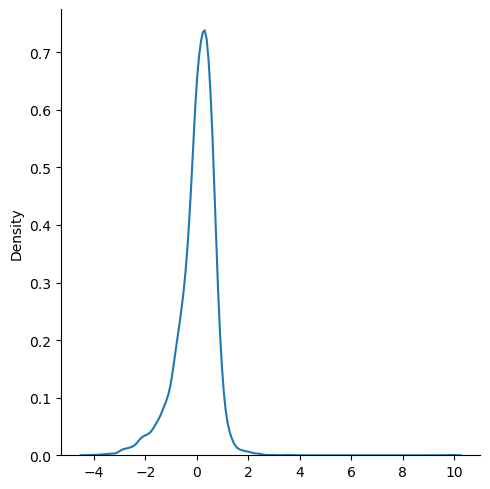

In [24]:
import seaborn as sns
sns.displot(reg_predict - y_test,kind = 'kde')

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(reg_predict,y_test)

In [27]:
score

0.3451339380943981

In [28]:
!git add .

In [29]:
!git commit -m "linear-regression"

[main 8a48662] linear-regression
 1 file changed, 304 insertions(+), 344 deletions(-)


In [30]:
!git push

To https://github.com/PratyushPoddar07/DATA_Project.git
   353a62c..8a48662  main -> main


## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV ## hyperparam tuning

In [32]:
ridge_regressor = Ridge()

In [33]:
parameters = {'alpha': [0.001,0.01,0.1,0.5,1,2,5,10,20,50,100]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring = 'neg_mean_squared_error',cv =5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [34]:
print(ridgecv.best_params_)

{'alpha': 5}


In [35]:
print(ridgecv.best_score_)

-0.5268179966861519


In [36]:
ridge_predict = ridgecv.predict(X_test)
ridge_predict

array([0.72799408, 1.76647219, 2.70889662, ..., 2.07364426, 1.57452579,
       1.82666041])

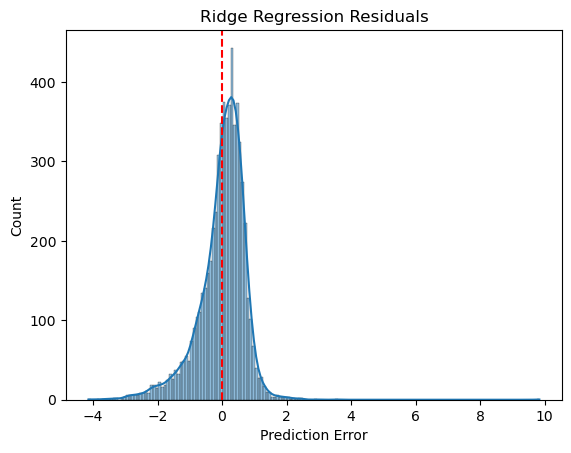

In [37]:
plt.figure(figure=(10,6))
sns.histplot(ridge_predict - y_test,kde =True)
plt.title('Ridge Regression Residuals')
plt.xlabel('Prediction Error')
plt.axvline(x =0,color ='r',linestyle='--')

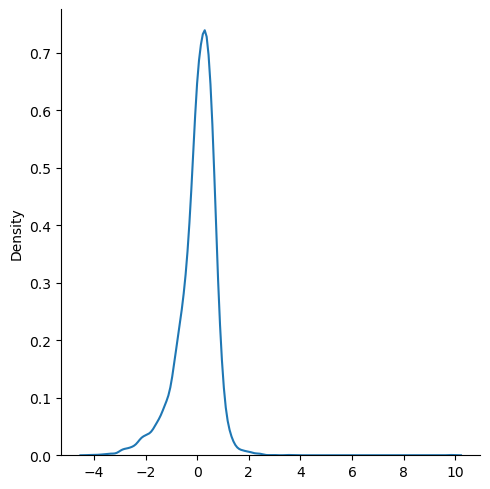

In [38]:
sns.displot(ridge_predict - y_test,kind ='kde')

In [39]:
score = r2_score(y_test,ridge_predict)

In [40]:
score

0.5958597389519955

In [41]:
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
mse = mean_squared_error(y_test,ridge_predict)
print(f"Ridge R2 score:{score:.4f}")
print(f"Ridge MSE: {mse:.4f}")

Ridge R2 score:0.5959
Ridge MSE: 0.5305


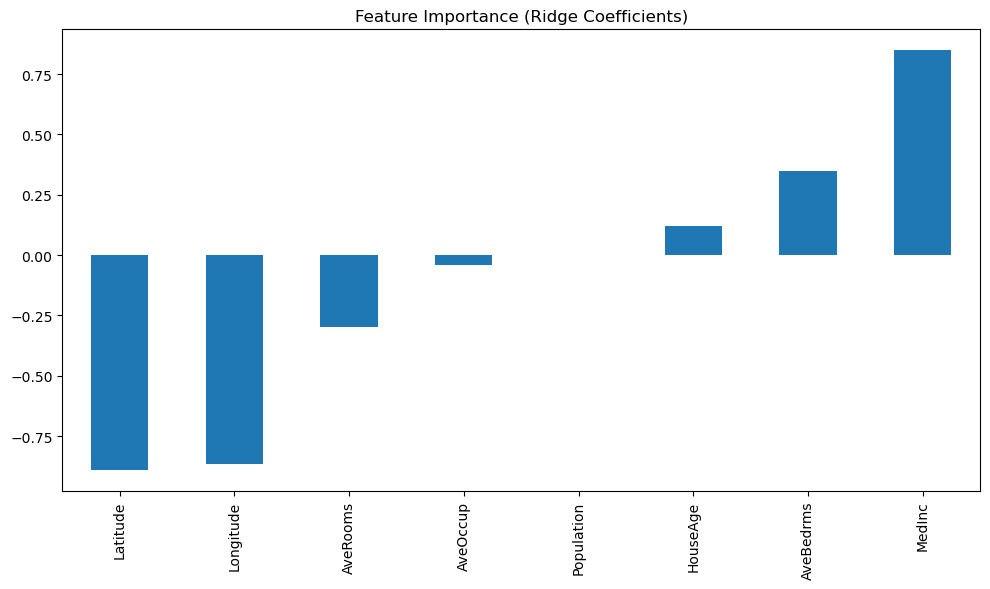

In [43]:
coef = pd.Series(ridgecv.best_estimator_.coef_,index =df.feature_names)
plt.figure(figsize = (10,6))
coef.sort_values().plot(kind = 'bar')
plt.title('Feature Importance (Ridge Coefficients)')
plt.tight_layout()

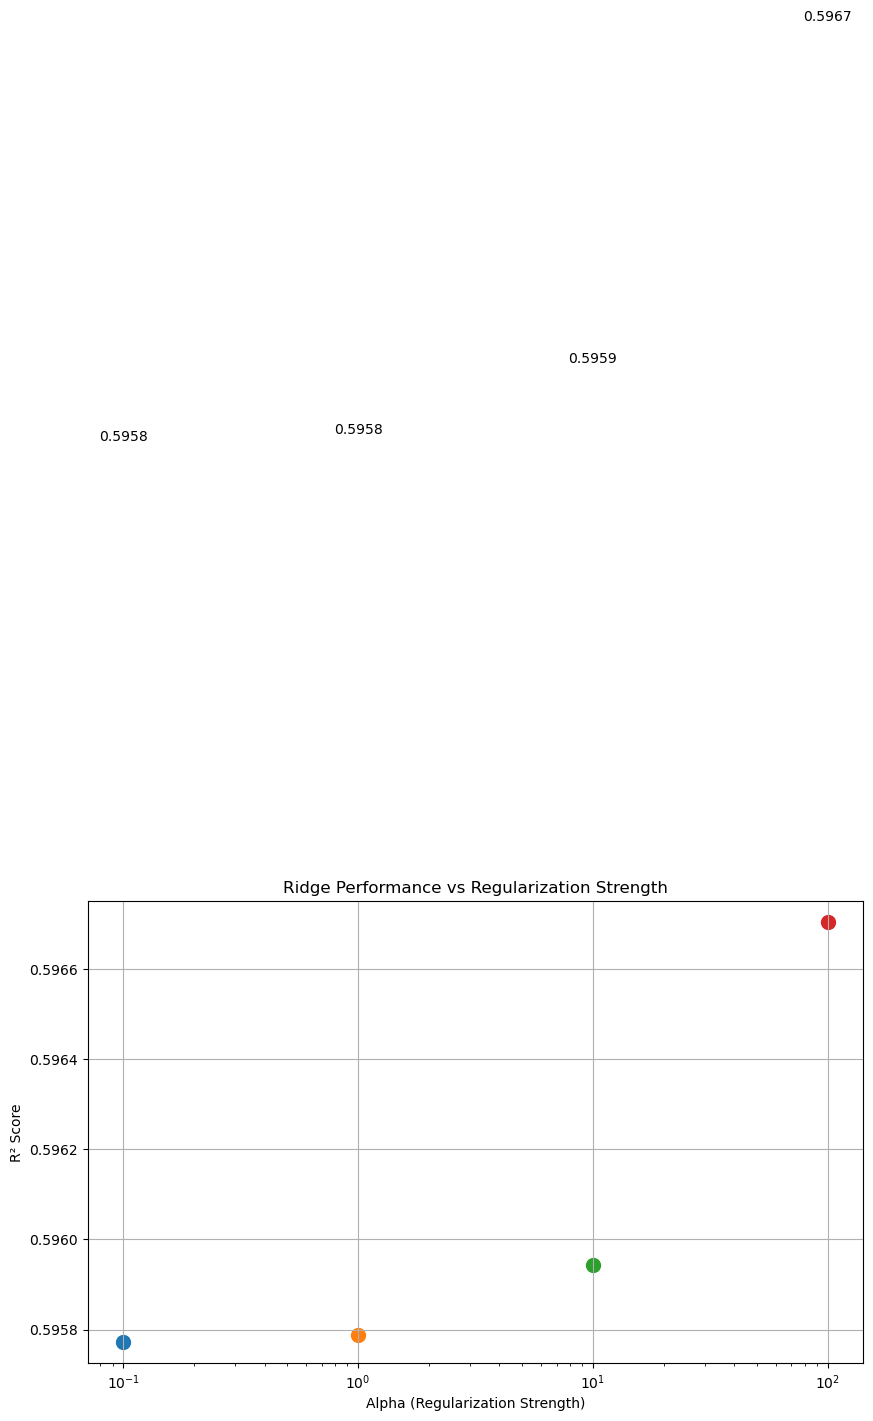

In [44]:
# Compare different alpha values to visualize regularization effect
plt.figure(figsize=(10, 6))
alphas_to_plot = [0.1, 1, 10, 100]
for alpha in alphas_to_plot:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, pred)
    plt.scatter(alpha, r2, s=100)
    plt.text(alpha, r2 + 0.002, f"{r2:.4f}", ha='center')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Performance vs Regularization Strength')
plt.grid(True)

## Lasso


In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso(max_iter = 10000)

In [47]:
parameters = {'alpha': [0.0001, 0.001,0.01,0.1,0.5,1,2,5,10,20]}
lassocv = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv =5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [48]:
print(lassocv.best_params_)

{'alpha': 0.001}


In [49]:
print(lassocv.best_score_)

-0.526481690640263


In [50]:
lasso_predict = lassocv.predict(X_test)

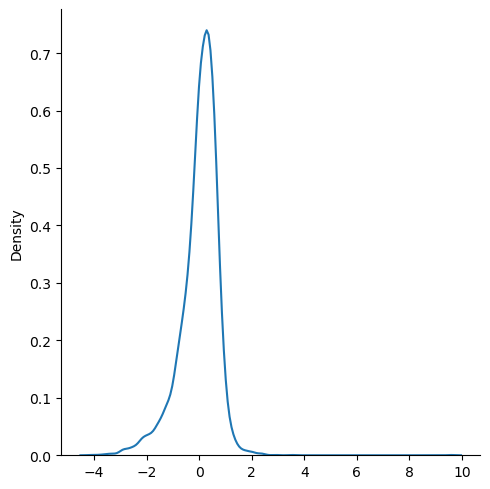

In [51]:
sns.displot(lasso_predict - y_test,kind ='kde')

In [52]:
score = r2_score(y_test,lasso_predict)

In [53]:
score

0.5963975777208825

In [54]:
## display features importance
coef = pd.Series(lassocv.best_estimator_.coef_,index = df.feature_names)

In [55]:
plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

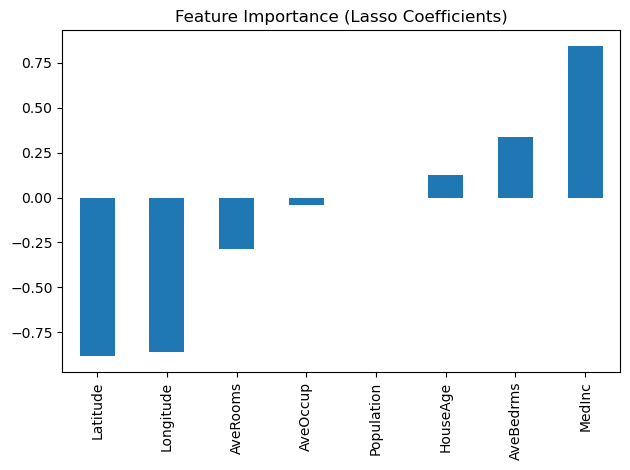

In [56]:
coef.sort_values().plot(kind='bar')
plt.title('Feature Importance (Lasso Coefficients)')
plt.tight_layout()

In [57]:
## print non-zero coefficients (selected features)
print("Feautres selected (non-zero coefficients):")
print(coef[coef != 0].sort_values(ascending =False))

Feautres selected (non-zero coefficients):
MedInc       0.843904
AveBedrms    0.334580
HouseAge     0.122809
AveOccup    -0.040719
AveRooms    -0.285848
Longitude   -0.857151
Latitude    -0.883086
dtype: float64


## use Elastic Net

In [58]:
# Try ElasticNet as an alternative approach
from sklearn.linear_model import ElasticNet

In [59]:
elastic_net = ElasticNet(alpha =0.1,l1_ratio=0.5,max_iter = 10000,random_state = 42)
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.1, max_iter=10000, random_state=42)

In [60]:
# make predictions with ElasticNet
elastic_predict  = elastic_net.predict(X_test)

In [61]:
# Calculate ElasticNet R2 score
elastic_score = r2_score(y_test,elastic_predict)
print(f"ElasticNet r2 score: {elastic_score}")

ElasticNet r2 score: 0.5276076234713187


In [62]:
# compare model performance
models = ['Linear Regression','Ridge','Improved Lasso','ElasticNet']
r2_scores = [0.345,0.344,score,elastic_score]

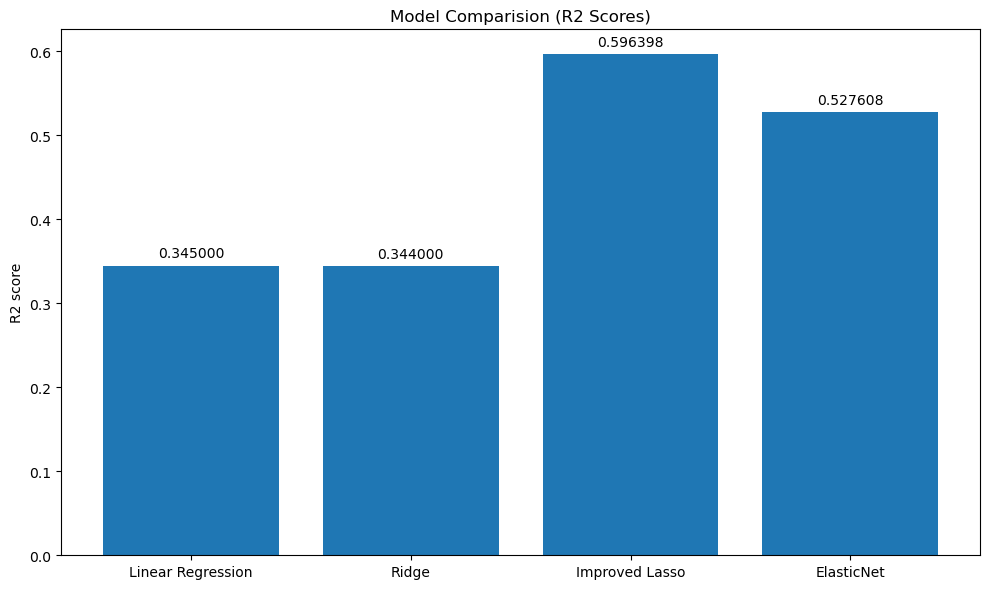

In [63]:
plt.figure(figsize =(10,6))
plt.bar(models,r2_scores)
plt.title('Model Comparision (R2 Scores)')
plt.ylabel('R2 score')
for i,s in enumerate(r2_scores):
    plt.text(i,s + 0.01,f"{s:3f}",ha ='center')
plt.tight_layout()

In [64]:
!git add .

In [65]:
!git commit -m "updated"

[main 0ccb703] updated
 1 file changed, 512 insertions(+), 1889 deletions(-)


In [66]:
!git push

To https://github.com/PratyushPoddar07/DATA_Project.git
   8a48662..0ccb703  main -> main
